# Communication Pipeline

In this unit we will gain understanding and practice on how information is passed between different components of the drone such as the onboard computer and the flight controller.

You should have already been exposed to the basic concepts of the Robot Operating System (ROS) during the online portion of this class. These concepts including things like nodes, topics, messages, services, etc. If you are unsure/uncomfortable with what these concepts imply, there are great tutorials online for walking you through the basics of ROS.

## Talker - Listener

We are going to put some of basic tools of ROS2 into practice on the Intel RTF Drone. We are going to start by creating and sending a simple message in one ROS2 node (i.e. talker) and receiving it in another.

[Pub-Sub Tutorial](https://ros2-industrial-workshop.readthedocs.io/en/latest/_source/basics/ROS2-Simple-Publisher-Subscriber.html)

### Question Set 1:

1. List all rosnodes that exist after running the publisher
2. List all rostopics that are being present after running the publisher
3. What command do I run to see what is being published to a topic?
4. What would I change in the publisher to make it publish messages more frequently?
5. In terminal I run the python script for the subcriber and see information being printed. Does this mean it is publishing to a topic?
6. What is the main benefit of a composed node? How might this help in drone autonomy applications?

## Launch Files

It's a cumbersome to be opening a different terminal for every different rosnode you want to start. Instead of doing this, we can use launch files.

Read the launch file tutorial here:
[Creating a Launch File](https://docs.ros.org/en/humble/Tutorials/Intermediate/Launch/Creating-Launch-Files.html)

### Question Set 2:

1. What needed to be added the launch file?
2. With `rqt_graph` open, use the button in upper right corner to save an image of the graph and include it in this report. Which components in the graph indicates rosnodes and which indicate rostopics?
2. Why do we need to run the command when and why do we need to source a bash file?
3. Were there any steps that didn't work or were particularly confusing? How did you work around them?
4. Create a launch file for the subscriber and listener you made above.

## Document and Push

Congratulations! You have implemented one of the basic building blocks of ROS! Now that you have this demo complete, you will want to push your code changes to your GitHub.

First double check that the repository you are working with on your drone or laptop points to the correct remote repository. 

Finally, document the answers to question sets and push those to your teams `documents` repository. You can write up the answers any way you want, but the easiest is probably to create a file called `communication_pipeline_answers.md`, and write a bullet point or paragraph for each question.

## microXRCE-DDS

The microXRCE-DDS (eXtremely Resource-Constrained Environment Data Distribution Service) client for ROS 2 and PX4 is a middleware that enables communication between microcontroller-based systems and the ROS 2 ecosystem. It facilitates efficient and reliable data exchange for resource-constrained devices, such as drones and embedded systems.

### Steps:
1. Navigate into your PX4-Autopilot folder and make the simulator

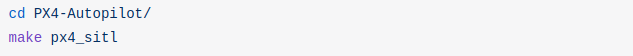

2. Follow this link and scroll down to 'Setup Micro XRCE-DDS Agent & Client'

    [MicroXRCE Setup](https://docs.px4.io/main/en/ros2/user_guide.html). 
    
### Question Set 3:
1. What happens after you run the DDS Client? Post a screenshot of your terminal output
2. What happens when you run [ros2 topic list]?
3. What happens when you run [ros2 node list]?
4. Pick a topic and try to view the inforumation using echo. Were you able to? What package makes this possible?
5. Launch QGround Control and the px4_sitl [make px4_sitl]. Can you figure out how to takeoff and land the drone? Save a screen recording of your team taking off and landing the drone.

## MAVROS for ROS2

Communication with the PX4 Firmware running is managed with a service called [MAVLink](https://mavlink.io/en/). Similar to how ROS messages pass information between nodes on Ubuntu, MAVLink messages pass information between ROS/Ubuntu/Compute Board and PX4/NuttX/PixHawk.

The MAVLink protocol is low-level, which makes it powerful and extensible, but also complicated to use. To simplify our lives, we will make use of [MAVROS](https://github.com/mavlink/mavros/blob/ros2/mavros/README.md). MAVROS can be thought of as a "wrapper" for MAVLink that simplifies the communication with ROS.

For ROS 2, most of the communication can be done via [microXRCE-DDS](https://github.com/eProsima/Micro-XRCE-DDS), if the controller supports it. It integrates seamlessly with the DDS-based communication system in ROS 2, allowing small devices like microcontrollers to participate in ROS 2 networks.

However, MAVROS offers more tools and extensive support for high-level control and monitoring of MAVLink-based drones. It provides a rich feature set and robust support for a wide range of MAVLink functionalities, making it a preferred choice for many drone applications.

### Summary
- **MAVROS**: Simplifies MAVLink communication for ROS 2, providing extensive tools and support for drone-specific functionalities.
- **microXRCE-DDS**: Enables DDS-based communication for resource-constrained devices within ROS 2, useful for integrating microcontrollers and small devices.

Depending on your specific needs and the capabilities of your drone's controller, you can choose the most appropriate communication method.


<!-- ### Step 2. Sending Commands

Next we are going to use the `mavros` node to send commands to PX4 and receive information about the state of the quadrotor. Since we are only learning the communication structure of the drone, we won't actually be flying it with these commands, just observing that they get passed correctly.

In `aero_control/communication_pipeline/src` you should find two other files `dispatcher.py` and `command_generator.py`. As with the previous section, these files are missing a block of code that you need to fill in; see the code for instructions on what needs to be completed.

Once you have completed writing your code, let's test it out. On the drone in multiple terminals run:

_Terminal 1:_
```
roscore
```

_Terminal 2:_
```
rosrun mavros mavros_node _fcu_url:=tcp://127.0.0.1:5760 _system_id:=2
```

_Terminal 3:_
```
cd ~/bwsi-uav/catkin_ws/src/aero_control/communication_pipeline/src
python dispatcher.py
```

_Terminal 4:_
```
cd ~/bwsi-uav/catkin_ws/src/aero_control/communication_pipeline/src
python command_generator.py
```

Assuming you got no errors, answer the following questions (if you did get errors, are you able to debug them?)

#### Question Set 2:

1. What new nodes and topics were created by running dispatcher.py and command_generator.py that weren't present when just running mavros?
2. Inspect the messages being sent on `/velocity_command` and `/mavros/setpoint_velocity/cmd_vel_unstamped`. Do they appear to be the same? Are the being passed at roughly the same rate? Which one is actually being sent to the PX4/AeroFC?
3. Why would we want to impose a limit on the velocity command sent to the flight controller?
4. As with the previous section, it is cumbersome to run each command in a separate terminal. To this end we have included a partial launch file in `aero_control/communication_pipeline/launch/mavros.launch`. Can you complete the launch file and run it in order to kick off mavros, dispatcher, and command_generator simultaneously?
5. When all nodes are running, use rqt_graph to generate an image of the nodes and topics.

### Step 3: Document and Push

As before, document the answers to the preceeding question sets and push them to your team's `documents` repository -->

## Advanced Topics: 

### uORB

So far we have only seen communication on the Compute Board/Laptop and how to pass messages to the Flight Controller. We haven't actually looked at message passing that occurs onboard the Flight Controller in the PX4 firmware. The Flight Controller uses a different system known as "uORB". We will cover this in a later lecture but you can learn more uORB in the link below:

 - [uORB Messaging](https://docs.px4.io/main/en/middleware/uorb.html)
 
### ROS2/ROS1 Bridge

ROS2 is fairly new and most legacy systems are running on ROS1. In fact, proceeding with this course with ROS2 was a bold choice to make as there are many roadbumps that may be new to all of us. A ROS 2/ROS 1 bridge is a communication bridge that allows nodes from ROS 2 to interact with nodes from ROS 1, enabling data exchange and interoperability between the two versions of the Robot Operating System. It facilitates the transition from ROS 1 to ROS 2 by allowing developers to integrate existing ROS 1 nodes with new ROS 2 nodes, thus leveraging the strengths of both systems and ensuring compatibility during the migration process:
- [ros2_ros1_bridge](https://github.com/ros2/ros1_bridge)